Автор задач Karpov.Courses
https://karpov.courses/analytics?_gl=1*k4q7fv*_ga*MTIzOTE2ODc5MS4xNzA4NDEyMTEy*_ga_DZP7KEXCQQ*MTcxMDQxMTg2OS41Ni4xLjE3MTA0MTUyODkuMTAuMC4w

In [60]:
#Определить лояльных бренду покупателей

In [113]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [99]:
df = pd.read_csv('lesson_3_data_1_.csv', encoding='windows-1251')

In [100]:
df.head()

,Unnamed: 0,tk,pl,dia,hs,tc,cta,id_art,id_subsubfam,id_subfam,...,id_famn,id_seccion,id_subagr,id_agr,vta,uni,id_artn,art_sp,fam_sp,fam_en
0,1242,120071109002055793,1,2007/11/09,0.505729,110000761,11000076,21895,101070640100,1010706401,...,10107064,10107,101,1,0.68,1.0,21895,MARAVILLA 500 G Store_Brand,PASTA ALIMENTICIA SE,pasta
1,1243,120070601004053633,1,2007/06/01,0.588519,110000761,11000076,21816,101070640100,1010706401,...,10107064,10107,101,1,0.38,1.0,21816,FIDEO CABELLIN 500 G Store_Brand,PASTA ALIMENTICIA SE,pasta
2,1244,120070928004076410,1,2007/09/28,0.785498,28491841,2849184,562840,101070640100,1010706401,...,10107064,10107,101,1,1.55,2.0,562840,SPAGUETTI Nє 5 500 G Brand_1,PASTA ALIMENTICIA SE,pasta
3,1245,120070616003074261,1,2007/06/16,0.550961,95931501,9593150,28914,101070640100,1010706401,...,10107064,10107,101,1,1.03,2.0,28914,FIDEO FIDEUБ 500 Brand_7,PASTA ALIMENTICIA SE,pasta
4,1246,120070519001018477,1,2007/05/19,0.804954,93265591,9326559,159867,101070640100,1010706401,...,10107064,10107,101,1,1.09,1.0,159867,MACARRONES GRATINAR 5 Brand_2,PASTA ALIMENTICIA SE,pasta


In [101]:
user_df = df[['tc', 'art_sp']]

In [102]:
def split_drand_name(brand_name_date):
    return brand_name_date.split()[-1]

In [103]:
new_name = {'tc':'user_id', 'art_sp':'brand_info'}
user_df = user_df.rename(columns=new_name)
user_df.head()

,user_id,brand_info
0,110000761,MARAVILLA 500 G Store_Brand
1,110000761,FIDEO CABELLIN 500 G Store_Brand
2,28491841,SPAGUETTI Nє 5 500 G Brand_1
3,95931501,FIDEO FIDEUБ 500 Brand_7
4,93265591,MACARRONES GRATINAR 5 Brand_2


In [104]:
#user_df['brand_name'] = user_df.brand_info.apply(split_drand_name)
user_df['brand_name'] =user_df.brand_info.apply(lambda x: x.split()[-1])
user_df.head()

,user_id,brand_info,brand_name
0,110000761,MARAVILLA 500 G Store_Brand,Store_Brand
1,110000761,FIDEO CABELLIN 500 G Store_Brand,Store_Brand
2,28491841,SPAGUETTI Nє 5 500 G Brand_1,Brand_1
3,95931501,FIDEO FIDEUБ 500 Brand_7,Brand_7
4,93265591,MACARRONES GRATINAR 5 Brand_2,Brand_2


In [105]:
#Пользователи, которые совершили более 5 покупок
user_purchases = user_df.groupby(['user_id'], as_index=False)\
    .agg({'brand_info':'count'}).rename(columns={'brand_info':'count_purchases'})\
    .query("count_purchases >= 5")

In [106]:
#Количество уникальных брендов, которые покупал пользователь
user_unique_brands = user_df.groupby('user_id', as_index=False)\
    .agg({'brand_name': pd.Series.nunique})\
    .rename(columns={'brand_name': 'unique_brands'})

In [107]:
#Любимый бренд пользователя
lovely_brand_purchases_df = user_df.groupby(['user_id','brand_name'], as_index=False)\
    .agg({'brand_info':'count'})\
    .sort_values(['user_id', 'brand_info'], ascending=[False, False])\
    .groupby('user_id')\
    .head(1)\
    .rename(columns={'brand_name':'lovely_brand', 'brand_info':'lovely_purchases'})

In [108]:
loyality_df = user_purchases.merge(user_unique_brands, on='user_id')\
    .merge(lovely_brand_purchases_df, on='user_id')
loyality_df.head()

,user_id,count_purchases,unique_brands,lovely_brand,lovely_purchases
0,1031,6,2,Store_Brand,5
1,4241,5,2,Brand_4,3
2,25971,7,2,Store_Brand,5
3,40911,27,5,Brand_4,19
4,45181,5,4,Store_Brand,2


In [109]:
#пользователи, которые совершают покупки только у одного бренда
loyality_users = loyality_df[loyality_df.unique_brands == 1]

In [110]:
loyality_df['loyality_score'] = loyality_df.lovely_purchases/loyality_df.count_purchases

In [ ]:
loyality_df.head()

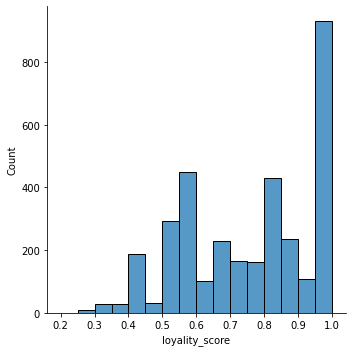

In [120]:
ax = sns.displot(loyality_df.loyality_score)

In [128]:
lovely_to_brand = loyality_df.groupby('lovely_brand', as_index=False)\
    .agg({'loyality_score':'median', 'user_id':'count'})
lovely_to_brand.head()

,lovely_brand,loyality_score,user_id
0,Brand_1,0.679487,410
1,Brand_2,0.600000,88
2,Brand_3,0.500000,115
3,Brand_4,0.818182,2041
4,Brand_5,0.600000,5


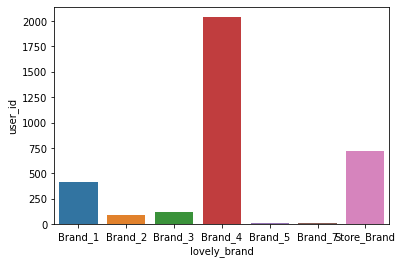

In [130]:
ay = sns.barplot(data=lovely_to_brand, x="lovely_brand", y="user_id")

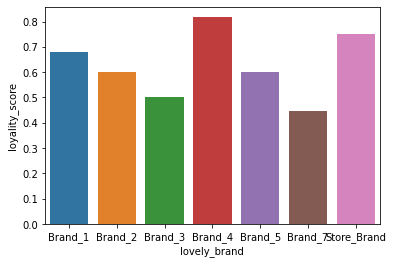

In [131]:
ay = sns.barplot(data=lovely_to_brand, x="lovely_brand", y="loyality_score")